## Mini Project: Emotion Dectection From Text Using Deep Learning

### Problem Statement:
Emotions play a crucial role in human communication, and understanding emotions from text data can enhance applications like sentiment analysis, customer support automation, and mental health monitoring. However, accurately classifying emotions in short text segments such as tweets is challenging due to informal language, abbreviations, and contextual ambiguity.

## Data Collection:
Use the Kaggle Emotion Dectection From Text predicto which contains. Download if from Kaggle.
#### https://www.kaggle.com/datasets/pashupatigupta/emotion-detection-from-text

In [6]:
import numpy as np 
import pandas as pd

In [7]:
data = pd.read_csv(r"C:\Users\Kavya Venkatesh\Downloads\archive (25)\tweet_emotions.csv")

In [8]:
data

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor
39996,1753919001,love,Happy Mothers Day All my love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [9]:
data.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [10]:
data.tail()

,tweet_id,sentiment,content
39995,1753918954,neutral,@JohnLloydTaylor
39996,1753919001,love,Happy Mothers Day All my love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...
39999,1753919049,love,@mopedronin bullet train from tokyo the gf ...


In [11]:
data.describe()

,tweet_id
count,4.000000e+04
mean,1.845184e+09
std,1.188579e+08
min,1.693956e+09
25%,1.751431e+09
50%,1.855443e+09
75%,1.962781e+09
max,1.966441e+09


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   content    40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 937.6+ KB


In [13]:
data.isnull()

,tweet_id,sentiment,content
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
39995,False,False,False
39996,False,False,False
39997,False,False,False
39998,False,False,False


In [14]:
data.isnull().sum()

tweet_id     0
sentiment    0
content      0
dtype: int64

In [15]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
39995    False
39996    False
39997    False
39998    False
39999    False
Length: 40000, dtype: bool

In [16]:
data.duplicated().sum()

0

#### Label Encoder

In [17]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [18]:
X = data.drop(columns=['content'])
y = data['content']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Libraries

In [19]:
import tensorflow as tf

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

#### Train and Test

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#### Single Layer Perceptron(SLP)

In [22]:
slp_model = Sequential([
    Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],))
])

C:\Users\Kavya Venkatesh\anaconda3.n\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Compile the data

In [23]:
slp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#### Fit the data

In [24]:
slp_model.fit(X_train, y_train, epochs=30, batch_size=42, validation_data=(X_test, y_test))

Epoch 1/30
762/762 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 2.0763e-05 - loss: -3135.0513 - val_accuracy: 1.2500e-04 - val_loss: -14713.0029
Epoch 2/30
762/762 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: -18539.7012 - val_accuracy: 1.2500e-04 - val_loss: -30085.5645
Epoch 3/30
762/762 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: -33784.3242 - val_accuracy: 1.2500e-04 - val_loss: -45476.5195
Epoch 4/30
762/762 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: -49265.4805 - val_accuracy: 1.2500e-04 - val_loss: -60856.8945
Epoch 5/30
762/762 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: -64560.0547 - val_accuracy: 1.2500e-04 - val_loss: -76245.2422
Epoch 6/30
762/762 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: -80119.3438 - val_accuracy: 1.2500e-04 - val_loss: -91640.7891
Epoch 7/30
762/762 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: -95111.5547 - val_accuracy: 1.2500e-04 - v

#### Predict the data

In [25]:
y_pred_slp = (slp_model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred_slp))

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step
              precision    recall  f1-score   support

           1       0.00      1.00      0.00         1
           6       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         1
          31       0.00      0.00      0.00         1
          47       0.00      0.00      0.00         1
          51       0.00      0.00      0.00         1
          55       0.00      0.00      0.00         1
          57       0.00      0.00      0.00         1
          63       0.00      0.00      0.00         1
          72       0.00      0.00      0.00         1
          73       0.00      0.00      0.00         1
          74       0.00      0.00      0.00         1
          75       0.00      0.00      0.00         1
          82       0.00      0.00      0.00         1
          87       0.00      0.00      0.00         1
          97       0.00      0.00     

C:\Users\Kavya Venkatesh\anaconda3.n\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Kavya Venkatesh\anaconda3.n\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Kavya Venkatesh\anaconda3.n\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### Multi-Layer Perceptron(MLP)

In [26]:
mlp_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

C:\Users\Kavya Venkatesh\anaconda3.n\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Compile the data

In [27]:
mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#### Fit the data

In [28]:
mlp_model.fit(X_train, y_train, epochs=10, batch_size=52, validation_data=(X_test, y_test))

Epoch 1/10
616/616 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0000e+00 - loss: -2896334.7500 - val_accuracy: 1.2500e-04 - val_loss: -46102220.0000
Epoch 2/10
616/616 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0000e+00 - loss: -96733080.0000 - val_accuracy: 1.2500e-04 - val_loss: -340032384.0000
Epoch 3/10
616/616 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: -483416448.0000 - val_accuracy: 1.2500e-04 - val_loss: -1031115200.0000
Epoch 4/10
616/616 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: -1287254016.0000 - val_accuracy: 1.2500e-04 - val_loss: -2196366848.0000
Epoch 5/10
616/616 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: -2578947584.0000 - val_accuracy: 1.2500e-04 - val_loss: -3889112064.0000
Epoch 6/10
616/616 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: -4434262016.0000 - val_accuracy: 1.2500e-04 - val_loss: -6143859712.0000
Epoch 7/10
616/616 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+0

#### Predict the data

In [29]:
y_pred_mlp = (mlp_model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred_mlp))

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step
              precision    recall  f1-score   support

           1       0.00      1.00      0.00         1
           6       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         1
          31       0.00      0.00      0.00         1
          47       0.00      0.00      0.00         1
          51       0.00      0.00      0.00         1
          55       0.00      0.00      0.00         1
          57       0.00      0.00      0.00         1
          63       0.00      0.00      0.00         1
          72       0.00      0.00      0.00         1
          73       0.00      0.00      0.00         1
          74       0.00      0.00      0.00         1
          75       0.00      0.00      0.00         1
          82       0.00      0.00      0.00         1
          87       0.00      0.00      0.00         1
          97       0.00      0.00     

C:\Users\Kavya Venkatesh\anaconda3.n\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Kavya Venkatesh\anaconda3.n\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Kavya Venkatesh\anaconda3.n\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense

Epoch 1/10


C:\Users\Kavya Venkatesh\anaconda3.n\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.2173 - loss: 2.1786 - val_accuracy: 0.2270 - val_loss: 2.1448
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.2363 - loss: 2.1239 - val_accuracy: 0.2479 - val_loss: 2.0761
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.2911 - loss: 2.0450 - val_accuracy: 0.3024 - val_loss: 1.9989
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.3233 - loss: 1.9606 - val_accuracy: 0.3261 - val_loss: 1.9610
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.3412 - loss: 1.9125 - val_accuracy: 0.3368 - val_loss: 1.9503
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.3609 - loss: 1.8644 - val_accuracy: 0.3314 - val_loss: 1.9538
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.3800 - loss: 1.8305 - val_accuracy: 0.3431 - val_loss: 1.9168
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.3970 - loss: 1.7789 - val_acc

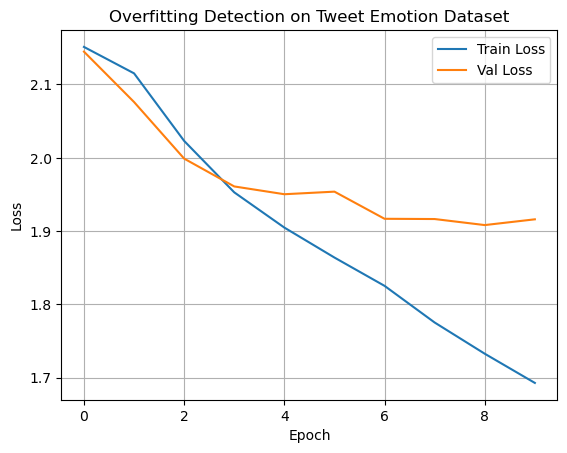

In [31]:
df = pd.read_csv(r"C:\Users\Kavya Venkatesh\Downloads\archive (25)\tweet_emotions.csv")


texts = df['content'].astype(str)  
labels = df['sentiment']


label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)


tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
X = pad_sequences(sequences, maxlen=100)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=100),
    GlobalAveragePooling1D(),
    Dense(64, activation='relu'),
    Dense(len(set(y)), activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


plt.plot(history.history['loss'], label='Train Loss') 
plt.plot(history.history['val_loss'], label='Val Loss') 
plt.title('Overfitting Detection on Tweet Emotion Dataset')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


#### Confusion Matrix

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


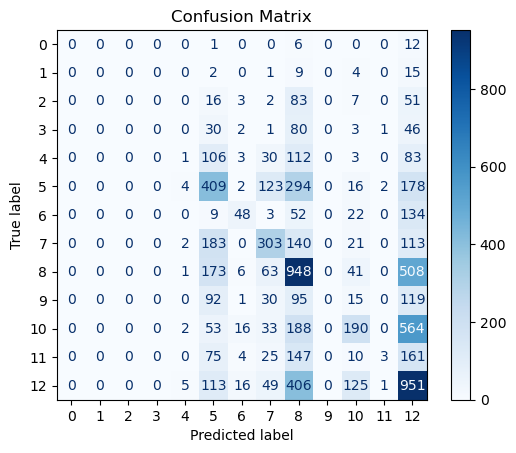

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test_labels = np.argmax(y_test, axis=1)
else:
    y_test_labels = y_test

 
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test_labels, y_pred_labels)

num_classes = cm.shape[0]
display_labels = [str(i) for i in range(num_classes)]

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap='Blues', values_format='d')

plt.title("Confusion Matrix")
plt.show()


#### Visualization

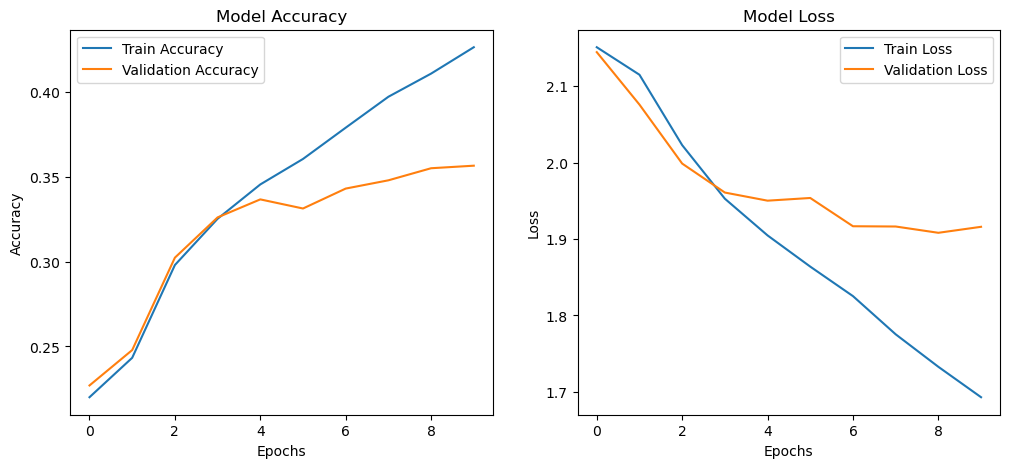

In [43]:
import matplotlib.pyplot as plt

history = model.history.history

plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='Train Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.show()
